In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# Dataset columns

columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']

# Load your dataset
training_data = pd.read_csv('poker-hand-training-true.csv', header=None, names=columns)
testing_data = pd.read_csv('poker-hand-testing.csv', header=None, names=columns)

# Adjust the ranks of cards, specifically changing Ace from 1 to 14
def adjust_ranks(data):
    for i in range(1, 6):  # For each card in the hand
        data[f'C{i}'] = data[f'C{i}'].apply(lambda x: 14 if x == 1 else x)
    return data

# One-hot encode the suits of the cards
def one_hot_encode_suits(data):
    for i in range(1, 6):  # For each card in the hand
        data = pd.concat([data, pd.get_dummies(data[f'S{i}'], prefix=f'S{i}')], axis=1).drop([f'S{i}'], axis=1)
    return data

# Apply preprocessing steps
def preprocess_data(data):
    data = adjust_ranks(data)
    data = one_hot_encode_suits(data)
    return data

training_data_preprocessed = preprocess_data(training_data)
testing_data_preprocessed = preprocess_data(testing_data)

X_train, X_val, y_train, y_val = train_test_split(training_data_preprocessed.drop('Class', axis=1).to_numpy(), training_data_preprocessed['Class'].to_numpy(), test_size=0.2, random_state=42)

#Final Preprocessed DATA
print(training_data_preprocessed.head())
print(testing_data_preprocessed.head())

   C1  C2  C3  C4  C5  Class   S1_1   S1_2   S1_3   S1_4  ...   S3_3   S3_4  \
0  10  11  13  12  14      9   True  False  False  False  ...  False  False   
1  11  13  10  12  14      9  False   True  False  False  ...  False  False   
2  12  11  13  10  14      9  False  False   True  False  ...   True  False   
3  10  11  14  13  12      9  False  False  False   True  ...  False   True   
4  14  13  12  11  10      9  False  False  False   True  ...  False   True   

    S4_1   S4_2   S4_3   S4_4   S5_1   S5_2   S5_3   S5_4  
0   True  False  False  False   True  False  False  False  
1  False   True  False  False  False   True  False  False  
2  False  False   True  False  False  False   True  False  
3  False  False  False   True  False  False  False   True  
4  False  False  False   True  False  False  False   True  

[5 rows x 26 columns]
   C1  C2  C3  C4  C5  Class   S1_1   S1_2   S1_3   S1_4  ...   S3_3   S3_4  \
0  14  13   4   3  12      0   True  False  False  False  ...  

In [3]:
# create a SVM classifier
clf = SVC(kernel='rbf', C=1, gamma=0.1)
clf.fit(X_train, y_train)
predicted_labels = clf.predict(testing_data_preprocessed.drop('Class', axis=1).to_numpy())

# calculate the accuracy
accuracy = accuracy_score(testing_data_preprocessed['Class'].to_numpy(), predicted_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.592405


In [4]:
# cross validation to test different kernls and hyperparameters
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

clf = SVC()

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_val, y_val)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

C:\Users\dantu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'kernel': 'rbf'}
Best cross-validated score:  0.5487782217782218


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       0.702746      0.016169         0.045111        0.001680       linear   
1       0.745407      0.017024         0.044863        0.001246         poly   
2       0.434870      0.005305         0.284997        0.001065          rbf   
3       0.265557      0.011074         0.056891        0.000839      sigmoid   

                  params  split0_test_score  split1_test_score  \
0   {'kernel': 'linear'}           0.510490           0.510490   
1     {'kernel': 'poly'}           0.536464           0.537463   
2      {'kernel': 'rbf'}           0.553447           0.555445   
3  {'kernel': 'sigmoid'}           0.470529           0.463536   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0              0.510              0.510              0.510         0.510196   
1              0.533              0.538              0.533         0.535585   
2              0.539           

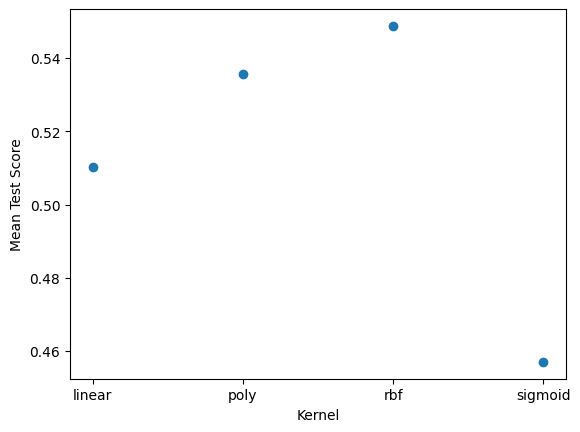

In [6]:
# plotting results
results = pd.DataFrame(grid_search.cv_results_)
print(results)

# scatter plot of results for each kernel
fig, ax = plt.subplots()
ax.scatter(results['param_kernel'], results['mean_test_score'])

ax.set_xlabel('Kernel')
ax.set_ylabel('Mean Test Score')
plt.show()